# Dealing with imbalanced dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.isnull().sum().max()

0

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

print('\nNo Frauds amount', df['Class'].value_counts()[0])
print('Frauds amount', df['Class'].value_counts()[1])

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset

No Frauds amount 284315
Frauds amount 492


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

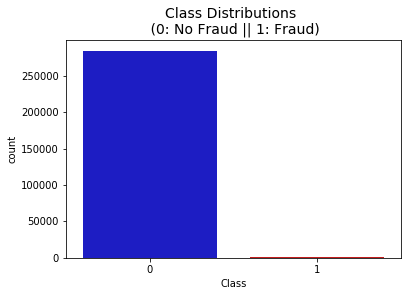

In [15]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

So the dataset is too unbalanced to ignore this fact. 

<class 'numpy.ndarray'>


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


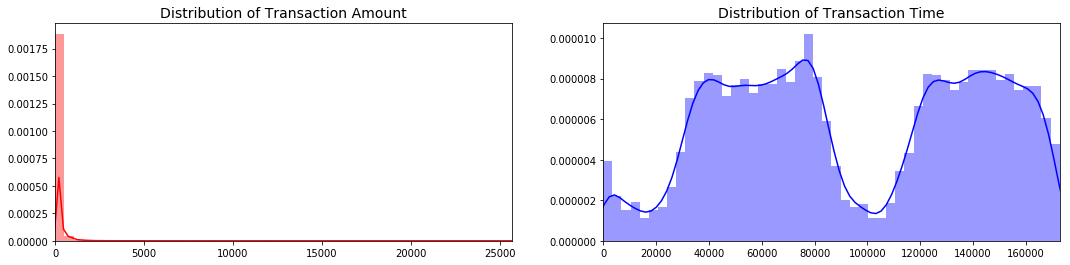

CPU times: user 4.67 s, sys: 1.23 s, total: 5.91 s
Wall time: 3.28 s


In [16]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# .values returns a numpy representation of the dataframe
amount_val = df['Amount'].values
print(type(amount_val))
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### Scaling the data

In [17]:
%%time
# Since most of our data has already been scaled 
# we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.head()

CPU times: user 126 ms, sys: 88 ms, total: 214 ms
Wall time: 211 ms


In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Splitting the data
In this scenario our subsample will be a dataframw with a 50/50 ratio of fraud and non-fraud transactions. 

Stratified K-Folds cross-validator provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold


X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
print('sss type', type(sss))

i = 0
for train_index, test_index in sss.split(X, y):
    print('Nubmer of fold:', i)
    print("Train:", train_index, '\n', "Test:", test_index)
    print("Len(train_index):", len(train_index), '\n', 
          "Len(test_index):", len(test_index), '\n\n')
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    i+=1

# We already have X_train and y_train for undersample data thats why I am using 
# original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, 
# original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

sss type <class 'sklearn.model_selection._split.StratifiedKFold'>
Nubmer of fold: 0
Train: [ 30473  30496  31002 ... 284804 284805 284806] 
 Test: [    0     1     2 ... 57017 57018 57019]
Len(train_index): 227845 
 Len(test_index): 56962 


Nubmer of fold: 1
Train: [     0      1      2 ... 284804 284805 284806] 
 Test: [ 30473  30496  31002 ... 113964 113965 113966]
Len(train_index): 227845 
 Len(test_index): 56962 


Nubmer of fold: 2
Train: [     0      1      2 ... 284804 284805 284806] 
 Test: [ 81609  82400  83053 ... 170946 170947 170948]
Len(train_index): 227846 
 Len(test_index): 56961 


Nubmer of fold: 3
Train: [     0      1      2 ... 284804 284805 284806] 
 Test: [150654 150660 150661 ... 227866 227867 227868]
Len(train_index): 227846 
 Len(test_index): 56961 


Nubmer of fold: 4
Train: [     0      1      2 ... 227866 227867 227868] 
 Test: [212516 212644 213092 ... 284804 284805 284806]
Len(train_index): 227846 
 Len(test_index): 56961 


------------------------------

#### Manual undersampling

In [20]:
# Since our classes are highly skewed we should make them equivalent 
# in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
151051,-2.051722,0.847075,-0.073294,-1.893895,0.238688,-1.625396,0.474386,0.331348,1.284429,-1.941896,...,-0.698800,0.293186,0.025208,0.082124,0.397713,-0.593349,-0.084359,0,-0.251520,0.114933
74496,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,-8.332863,...,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,1,-0.295815,-0.341616
21790,-2.797052,-1.193095,0.222240,-0.130965,0.209584,-0.015696,2.261211,-0.806968,0.652991,0.841395,...,0.758171,0.958462,0.063545,-0.247480,0.200318,-1.015289,0.007462,0,3.223503,-0.620731
156990,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,-4.458008,...,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,1,2.293440,0.289078
68633,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,-0.045088,...,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1,-0.290924,-0.371433


In [21]:
new_df.shape

(984, 31)

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


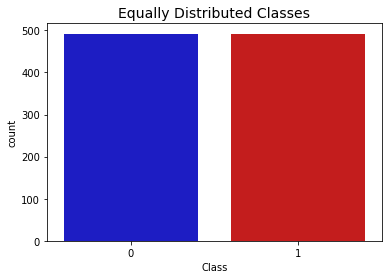

In [22]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Search for correlations

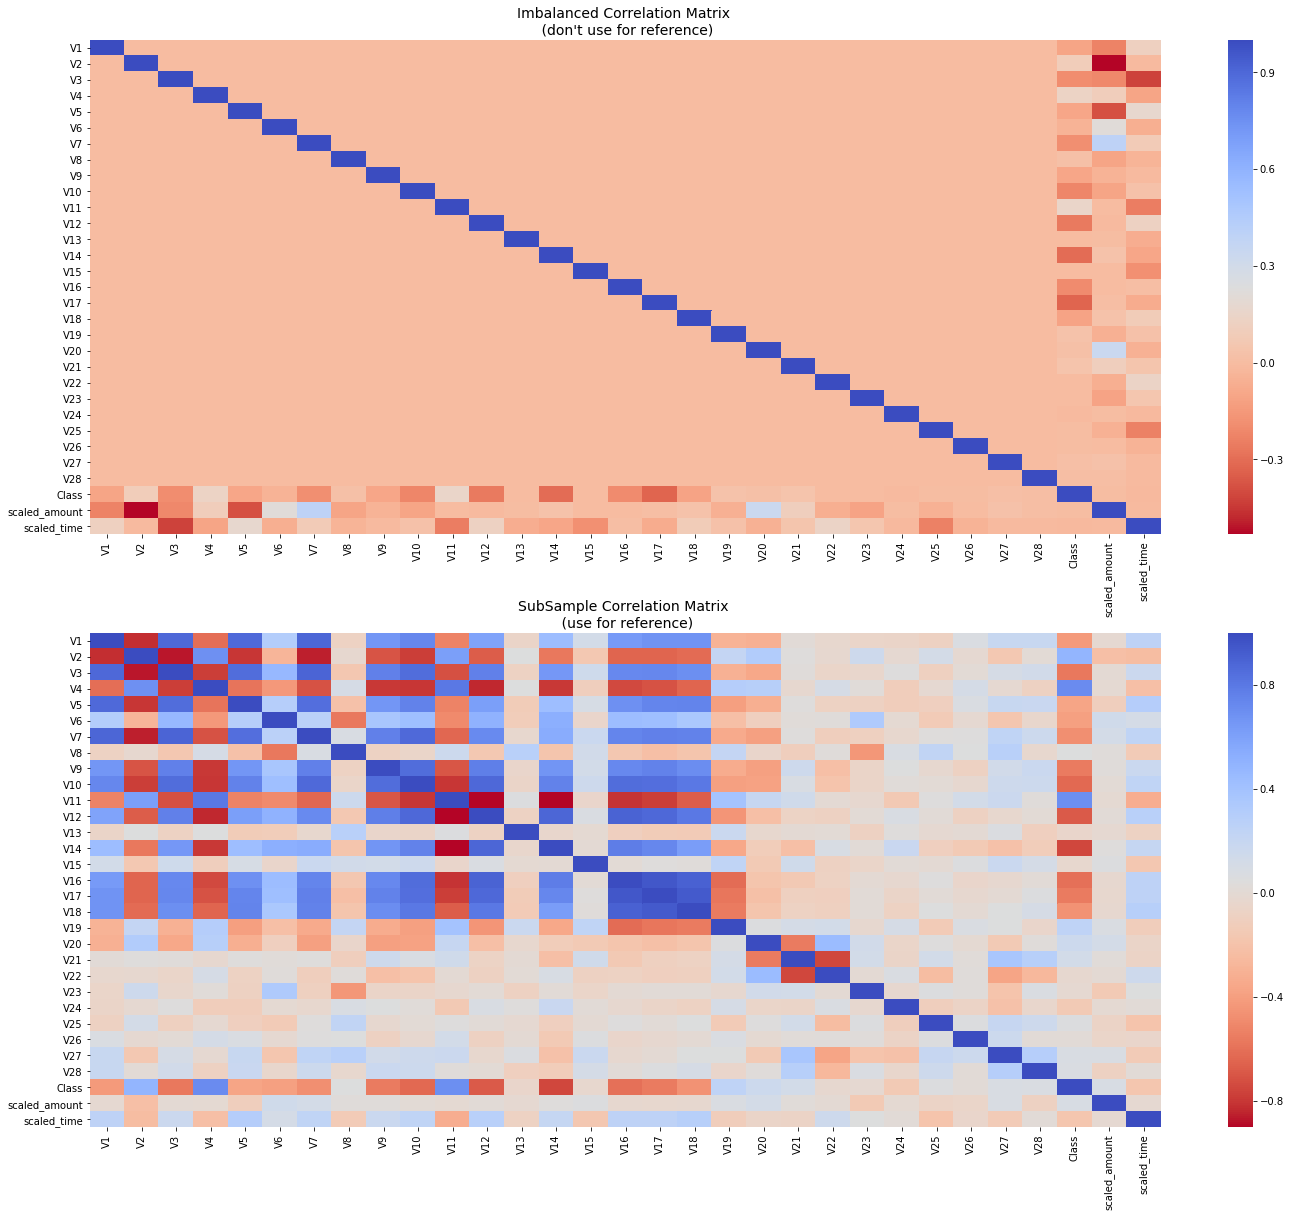

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
# df.corr() computes pairwise correlation of columns, excluding NA/null values.
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

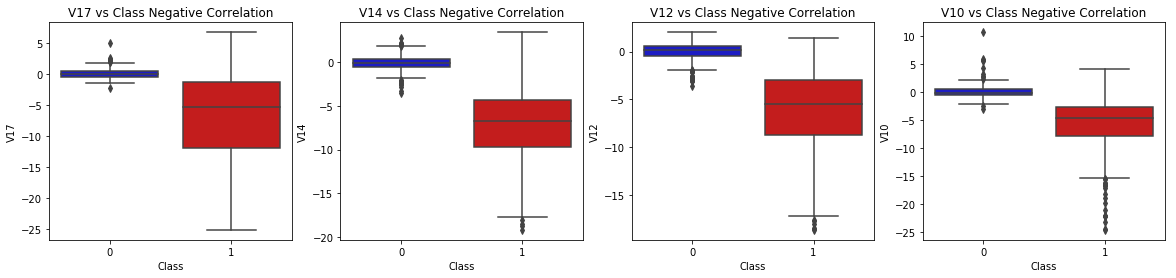

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

The imbalanced correlation matrix does not tell much because the classes in the dataset are highly imbalanced. But balanced chart does show some positive and negative correlation. For example, V17, V14, V12 and V10 are negatively correlated. The lower the value of this parameters - the higher the chance of a transaction to be fraud. 

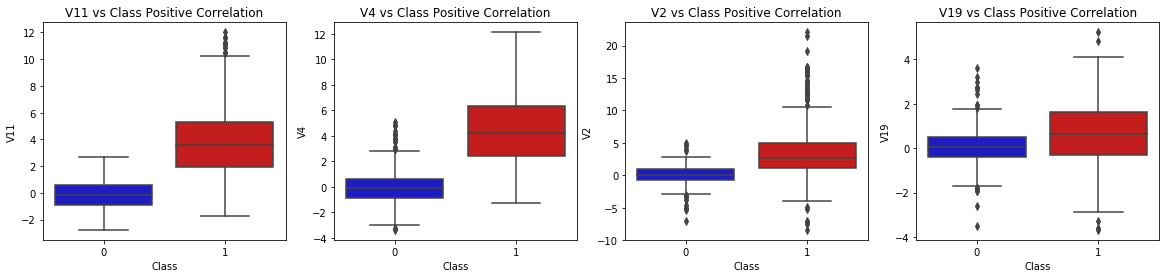

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

### Removing extreme outliers
Removing outliers may be actually a bad thing without contextual understanding. But since our features are anonymous and we are struggling to get a better model we can try and see if the metrics got any better. 
Will start with visualizing distributions.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


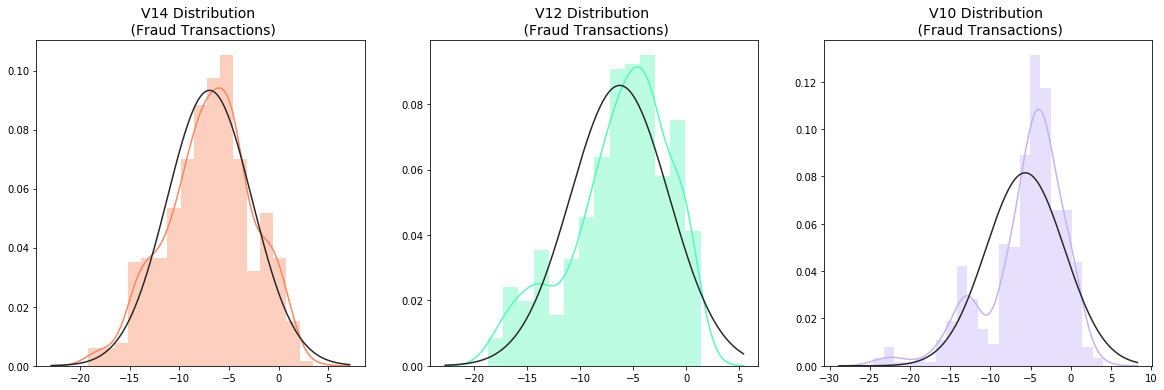

In [26]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

Only V14 feature has a distribution close to normal. 

#### What are outliers

mean: 50.01954531339821, std: 1.997571687376097
Number of outliers in the dist for cut_off=3*data_std: 29


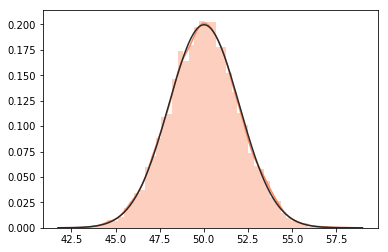


What outliers look like:
[56.06171422474406, 57.91720540807593, 56.64215751234073, 43.89247123914739, 43.6932850996179, 43.9679360295814, 56.86532686359112, 43.8717172877898, 57.48049780740918, 56.270094680175816, 56.47668639350475, 43.493931530046765, 56.26405945628101, 56.02550913647447, 43.61876730635184, 43.47876980844692, 56.80860455149794, 56.2369591815651, 56.59708104656157, 56.29796805043926, 43.41028318660297, 43.88873351917139, 58.05369808909475, 43.561735788752316, 56.22378366203345, 57.2265540141663, 56.79623131300485, 57.1217466414111, 42.68711980149041]


In [27]:
from numpy.random import seed, randn
from numpy import mean, std
seed(1)
data = 2 * randn(10000) + 50
print(f'mean: {mean(data)}, std: {std(data)}')
data_mean, data_std = mean(data), std(data)
cut_off_value = 3
cut_off = data_std * cut_off_value
lower, upper = data_mean - cut_off, data_mean + cut_off

outliers = [x for x in data if x < lower or x > upper]
print(f'Number of outliers in the dist for cut_off={cut_off_value}*data_std:',
      len(outliers))

sns.distplot(data, fit=norm, color='#FB8861')
plt.show()

print('\nWhat outliers look like:')
print(outliers)

In [30]:
print(sorted(outliers))

[42.68711980149041, 43.41028318660297, 43.47876980844692, 43.493931530046765, 43.561735788752316, 43.61876730635184, 43.6932850996179, 43.8717172877898, 43.88873351917139, 43.89247123914739, 43.9679360295814, 44.030327727458314, 44.1493899279004, 44.1710021652858, 44.226611868001, 44.25589949942547, 44.29786091479612, 44.31012481196899, 44.38553512861783, 44.39573591432758, 44.39687556694895, 44.41382999970692, 44.41711192415634, 44.41800718661231, 44.434931064694155, 44.478600496039064, 44.521716522072424, 44.553645212791366, 44.56012381808593, 44.57896624493793, 44.579212519065, 44.5833213712916, 44.59201320461683, 44.602162033697724, 44.603276516667904, 44.62975027464341, 44.64031050385325, 44.64631724730502, 44.65322023702545, 55.363676720932226, 55.41224984426123, 55.42042571523171, 55.42389974779031, 55.434772486270546, 55.458924270890186, 55.461690621853776, 55.48431042336453, 55.55410598628811, 55.574722895901324, 55.60910189453553, 55.63817418911183, 55.64357776073059, 55.6545

In [31]:
from numpy import percentile
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in data if x < lower or x > upper]
print(len(outliers))

81


Now back to removing ourliers in the actual dataset

In [33]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))


v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
